<a href="https://colab.research.google.com/github/YangJeongA/EnglishPhonetics-2022Fall/blob/main/221125_dimensionality_reduction(PCA).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Unsupervised learning: dimensionality reduction (PCA)

PCA: principal component analysis -> 아주 중요! 개념 잘 알기!

강의 영상에 사진자료
- clustering과 마찬가지로 input, output값이 따로 없고 변수 하나에 대해 실행함

1) 원점 이동

2) data에 맞게 rotation 

-> 차원을 줄임으로써 correlate되어있는 정보가 아닌 각각의 데이터를 이용 가능함

-> 데이터 분석할 때 유용하게 쓰일 수 있음 

즉, 데이터를 decorrelate하는 방법을 찾는 것.

- 여러가지 차원에 적용 가능함  


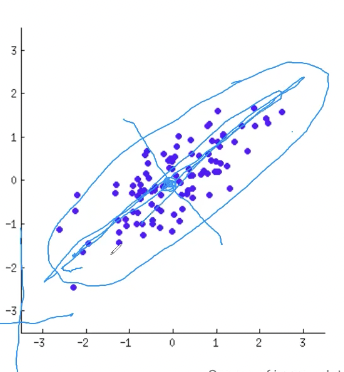

원래 x축, y축을 기준으로 하고 있는데, 위 그림처럼 축을 옮겨준다고 생각하면 됨. (가장 폭이 넓은 쪽이 첫번째 축, 그 다음 폭이 넓은 부분이 두번째 축). 

-> 이렇게 축을 옮겨준다고 해서 차원이 줄어드는 것은 아님. **차원은 기존과 같은데, 우리가 원하지 않는 차원은 뺄 수 있게 되는 것! 그래서 dimensionality reduction이라고 표현**하는 것임!!

+) 축은 왜 서로 90도의 관계를 가질까? 

: 90도의 관계를 가진다는 것은 서로 similarity가 하나도 없음을 의미함(cos(90)=0). correlation이 0임.

https://medium.com/analytics-vidhya/dimensionality-reduction-principal-component-analysis-d1402b58feb1

## Loading a dataset

In [ ]:
import pandas as pd
iris = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data', names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'label'])
iris

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [ ]:
X = iris.drop(['label'], axis=1)
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


## Principal Component Analysis (PCA)

In [ ]:
from sklearn.decomposition import PCA
model = PCA(n_components=2)  # n_components specifies the new dimensionality
X_reduced = model.fit(X).transform(X) # or just pca.fit_transform(X)
pd.DataFrame(X_reduced)

,0,1
0,-2.684207,0.326607
1,-2.715391,-0.169557
2,-2.889820,-0.137346
3,-2.746437,-0.311124
4,-2.728593,0.333925
...,...,...
145,1.944017,0.187415
146,1.525664,-0.375021
147,1.764046,0.078519
148,1.901629,0.115877


축이 달라졌기 때문에 값도 당연히 달라짐!! 

-> 기존에는 x축, y축을 중심으로 점이 가지는 값을 표현했던 건데, 점은 그대로인데 축이 달라졌으므로 당연히 점이 가지는 값이 달라짐

-> PCA의 결과값 = decorrelate된 값

In [ ]:
print('Components:', model.components_)
print('Explained Variance:', model.explained_variance_)
print('Explained Variance Ratio:', model.explained_variance_ratio_ )

Components: [[ 0.36158968 -0.08226889  0.85657211  0.35884393]
 [ 0.65653988  0.72971237 -0.1757674  -0.07470647]]
Explained Variance: [4.22484077 0.24224357]
Explained Variance Ratio: [0.92461621 0.05301557]


위 출력값에서 components: 에 해당하는 출력값이 아주 중요함~!

-> PCA를 한 값에 어떤 행렬을 곱하면 PCA 이전의 값으로 restore가 되는데, 이때 곱하는 '어떤 행렬'의 값이 바로 components의 출력값임!! 즉, original matrix를 구할 수 있게 해주는 것 
 

In [ ]:
X_approx = model.inverse_transform(X_reduced) 
pd.DataFrame(X_approx) 

# PCA 하기 전의 원본 행렬을 구하는 것 (조금 차이가 나긴 함. 그래서 approximant라고 표현하는 것) -> model.inverse_transform이용

,0,1,2,3
0,5.087182,3.513156,1.402043,0.211056
1,4.750155,3.153664,1.462541,0.236932
2,4.708232,3.191519,1.307469,0.171933
3,4.645984,3.052915,1.460831,0.236367
4,5.075937,3.522147,1.362737,0.194581
...,...,...,...,...
145,6.669315,3.030827,5.390916,1.882264
146,6.148781,2.654828,5.131424,1.774158
147,6.532745,2.966170,5.255898,1.825818
148,6.607020,2.982112,5.367182,1.872398


In [ ]:
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


- 데이터는 벡터이다
- 벡터 공간에서의 한 점을 잘 이용하는 것이 AI이다